# 12.- Procesamiento de Lenguaje Natural (Natural Language Processing)

### 12.0.1.- Instalando TextBlob -- este lo instale en la MAC falta ponerlo en windows


#### librería de Python que se utiliza principalmente para procesamiento de lenguaje natural (NLP). Simplifica muchas de las tareas comunes que los desarrolladores y científicos de datos necesitan al trabajar con texto

Lo primero será instalar TextBlob desde el prompt de anaconda

conda install -c confa-forge textblob

Una vez ejecutado, corre el siguiente comando

ipython -m textblob.download_corpora

## 12.2.- TextBlob

### 12.2.2.- Crear un TextBlob

Vamos a crear un textblob con el texto 'Y cuando despertó. Todo a su alrededor era luminoso'

In [14]:
from textblob import TextBlob

In [16]:
texto="Y cuando despertó. Todo a su alrededor era luminoso"

In [18]:
blob=TextBlob(texto)

In [20]:
blob

TextBlob("Y cuando despertó. Todo a su alrededor era luminoso")

### 12.2.3.- Tokenizar

Ahora vamos a obtener una lista de oraciones

In [22]:
blob.sentences #metodo para dividir texto en oraciones

[Sentence("Y cuando despertó."), Sentence("Todo a su alrededor era luminoso")]

Y una lista de palabras

In [24]:
blob.words #divide en palabras

WordList(['Y', 'cuando', 'despertó', 'Todo', 'a', 'su', 'alrededor', 'era', 'luminoso'])

Repetimos para 'I have good discipline to study. In the future I will be a great engineer'

In [26]:
texto2=TextBlob("I have good discipline to study. In the future I will be a great engineer")

In [30]:
texto2.words

WordList(['I', 'have', 'good', 'discipline', 'to', 'study', 'In', 'the', 'future', 'I', 'will', 'be', 'a', 'great', 'engineer'])

In [32]:
texto2.sentences

[Sentence("I have good discipline to study."),
 Sentence("In the future I will be a great engineer")]

### 12.2.4.- Parte del habla

Ahora vamos a etiquetar cada parte de la oración en su categoría de sustantivo, pronotmbre, verbo, etc

In [34]:
texto2.tags #asigna etiquetas gramaticales

[('I', 'PRP'),
 ('have', 'VBP'),
 ('good', 'JJ'),
 ('discipline', 'NN'),
 ('to', 'TO'),
 ('study', 'VB'),
 ('In', 'IN'),
 ('the', 'DT'),
 ('future', 'NN'),
 ('I', 'PRP'),
 ('will', 'MD'),
 ('be', 'VB'),
 ('a', 'DT'),
 ('great', 'JJ'),
 ('engineer', 'NN')]

### 12.2.5.- Frases de sustantivos

Le podemos pedir noun phrases a nuestro textblob

In [36]:
texto2.noun_phrases #extraer las frases con sustantivos

WordList(['good discipline', 'great engineer'])

### 12.2.6.- Analisis de sentimientos

También podemos analizar el sentimento de una oración. Vamos dandole con l oración que traiamos

Ahora otro ejemplo = 'I am a bad student. I will not be able to finish my studies'

In [38]:
texto3=TextBlob("I am a bad student. I will not be able to finish my studies")

In [40]:
texto3.sentiment #El método .sentiment en TextBlob se utiliza para analizar el sentimiento de un texto. 

	#Polaridad: Un valor entre -1.0 y 1.0 que indica qué tan negativo o positivo es el texto.
	#1.0: Muy positivo
	#0.0: Neutro
	#-1.0: Muy negativo
	#Subjetividad: Un valor entre 0.0 y 1.0 que indica qué tan subjetivo u objetivo es el texto.
	#1.0: Muy subjetivo
	#0.0: Muy objetivo

Sentiment(polarity=-0.09999999999999992, subjectivity=0.6458333333333333)

Y lo repetimos para el mismo ejemplo pero frase por frase

In [42]:
for i in texto3.sentences:  # aqui agarramos cada oracion
    print (i.sentiment)

Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.5, subjectivity=0.625)


Se puede hacer lo mismo mediante NaiveBayes (en vez de el default pattern)

In [44]:
from textblob.sentiments import NaiveBayesAnalyzer

In [46]:
text3 = TextBlob("I am a bad student. I will not be able to finish my studies", analyzer=NaiveBayesAnalyzer())

In [48]:
text3.sentiment

Sentiment(classification='pos', p_pos=0.9111144935259595, p_neg=0.08888550647403913)

## 12.3.- Detección de lenguaje y traducción

Escribe Bonjour y determina el lenguaje usando textblob

In [16]:
from langdetect import detect
from textblob import TextBlob

# Crear un objeto TextBlob
texto4 = TextBlob("Bonjour")

# Usar langdetect para detectar el idioma del texto
idioma = detect(texto4.raw)  # 'raw' devuelve el texto subyacente de TextBlob

print(f"El idioma detectado es: {idioma}")

El idioma detectado es: fr


Ahora usa textblob para traducir "I have good discipline to study. In the future I will be a great engineer'

In [18]:
texto5="I have good discipline to study. In the future I will be a great engineer"

In [20]:
blob=TextBlob(texto5)

In [22]:
traducido=blob.translate(to='es')

AttributeError: 'TextBlob' object has no attribute 'translate'

## revisar actulizaciones sobre todo esto

In [86]:
from googletrans import Translator

# Crear un objeto traductor
translator = Translator()

# Texto que deseas traducir
texto5 = "I have good discipline to study. In the future I will be a great engineer."

# Traducir el texto al español
traducido = translator.translate(texto5, dest='es')
print(traducido.text)  # Texto traducido

ModuleNotFoundError: No module named 'httpx'

### 12.3.1.- Inflección - pluralización y singularización

Textblob también entiende de singulares y plurales, obten el plural de party y el singular de lives

In [224]:
from textblob import Word
vegetal=Word("potato")
vegetal.pluralize()

'potatoes'

### 12.3.2.- Spell Check

Python tambien puede revisar ortografia, revisa que opina de la palabra whife

In [234]:
from textblob import Word  #piensacual sería la palabra correcta y te la probabilidad de cual podría ser
palabra=Word("whife")
palabra.spellcheck()

[('while', 0.5137123745819397),
 ('wife', 0.2454849498327759),
 ('white', 0.23612040133779263),
 ('whiff', 0.0033444816053511705),
 ('whine', 0.0013377926421404682)]

También puedes revisar ortografía de una oración completa como 'Yestarday was a bab dai'

In [243]:
enunciado=TextBlob("Yestarday was a vad dai") #medio corrige pero mal
enunciado.correct()

TextBlob("Yesterday was a had day")

### 12.3.3.- Normalización

Se puede obtener  el stem y lemma de una palabra plural como dormitories

### 12.3.4.- Frecuencias de Palabras

Que pasa si quieres conocer la frecuencia de una palabra?

Importa el texto de dracula.txt y cuenta las veces que aparece la palabra crucifix, dracula, blood

In [268]:
from pathlib import Path
text=open("dracula.txt",encoding="utf-8")
libro=TextBlob(text.read())
libro.words.count("blood")

110

In [270]:
libro.words.count("crucifix")

19

O puedes contar las frases especificas mediante el metodo count en un archivo ya tokenizado, intentalo con la frase "lady capulet"

### 12.3.5.- Definiciones, sinonimos y antonimos

Puedes buscar definiciones desde textblob

Prueba con la definición de "worker"

In [276]:
prueba=Word("worker")
prueba.definitions

['a person who works at a specific occupation',
 'a member of the working class (not necessarily employed)',
 'sterile member of a colony of social insects that forages for food and cares for the larvae',
 'a person who acts and gets things done']

O sinonimos también, con synsets

In [282]:
prueba.synsets #sinonimos

[Synset('worker.n.01'),
 Synset('proletarian.n.01'),
 Synset('worker.n.03'),
 Synset('actor.n.02')]

### 12.3.6.- Stop Words

Las stop words son palabras que generalmente no aportan información útil para un analisis de machine learning. 

Hay que traerlas desde ntlk

In [76]:
import nltk

In [78]:
nltk.download ("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tonalli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
from nltk.corpus import stopwords

In [82]:
stops=stopwords.words("english")

In [84]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Vamos a crear un texto como I have a beautiful day

In [300]:
blob =TextBlob("I have a beautiful day")

Y eliminar su stop words

In [304]:
[word for word in blob.words if word not in stops]

['I', 'beautiful', 'day']

## 12.4.- Visualizando frecuencias de palabras

Vamos a armar un word cloud de dracula, comencemos volviendo a cargar dracula

In [28]:
from pathlib import Path
from textblob import TextBlob
texto=open('dracula.txt', encoding='utf-8')
libro_drac=TextBlob(texto.read())

Ahora vamos cargando las stop words de inglés

In [30]:
from nltk.corpus import stopwords
stops=stopwords.words('english')

Vamos a obtener las frecuencias de palabras

In [32]:
items=libro_drac.word_counts.items()


Ahor avamos a eliminar las stop words

In [34]:
items=[item for item in items if item[0] not in stops]

In [36]:
from operator import itemgetter
items_ordenados=sorted(items,key=itemgetter(1),reverse=True)

Ordenamos las palabras restantes por frecuencia

In [38]:
primeros15=items_ordenados[1:16]

Conseguimos las top 20 palabras

Luego convertimos el top 20 a un dataframe

In [40]:
import pandas as pd 
datos=pd.DataFrame(primeros15,columns=['palabra','frecuencia'])

In [44]:
datos.head(14)

,palabra,frecuencia
0,could,505
1,one,492
2,us,463
3,must,449
4,would,447
5,may,431
6,shall,424
7,know,397
8,see,395
9,time,384


Y visualizamos el dataframe en una grafica de barras sencillita

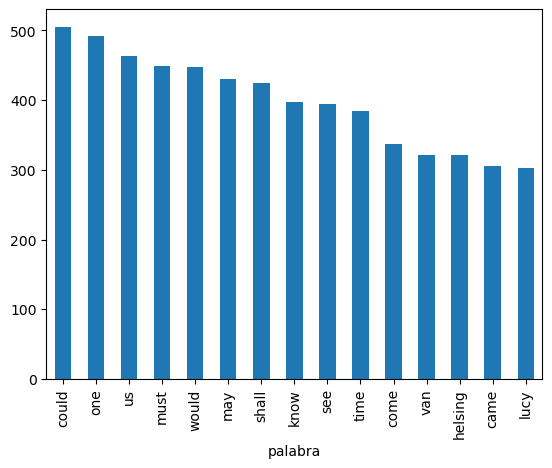

In [46]:
ejes=datos.plot.bar(x='palabra',y='frecuencia',legend=-
False)

### 12.4.1.- Word Cloud

Ahora necesitamos instalar el módulo WordCloud

Cargamos las librerias que nos importan

In [48]:
from pathlib import Path
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

Vamos a cargar el texto de tracua y las palabras stop

In [50]:
texto=open('dracula.txt',encoding='utf-8').read()
stopwords=set(STOPWORDS)

Vamos a crear una mascara para la nube usando la funcion impread

In [52]:
import imageio.v2 as imageio  # Utiliza la versión 2 de imageio

mascara = imageio.imread('mask_oval.png')

OK, ahora ponemos algunas caracteristicas especifcas de la nube a crear

In [54]:
drac_nubpal=WordCloud(colormap='prism', background_color='white',
max_words=1000, stopwords=stopwords, mask=mascara)

Luego se aplica el metodo de generar wordcloud

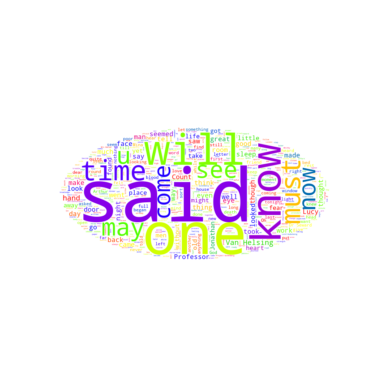

In [56]:
import matplotlib.pyplot as plt # la imagen se hizo en canva, la hoja blanca y el ovalo negro

# Genera la nube de palabras
drac_nubpal.generate(texto)

# Muestra la nube de palabras
plt.imshow(drac_nubpal, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()  # Muestra la nube de palabras
drac_nubpal=drac_nubpal.to_file('dracula.png')

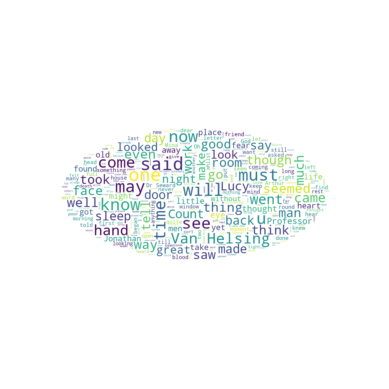

In [58]:
drac_nubpal = WordCloud(mask=mascara, background_color='white', max_words=300, max_font_size=50, relative_scaling=0.5).generate(texto)

plt.imshow(drac_nubpal, interpolation='bilinear')
plt.axis('off')
plt.show()

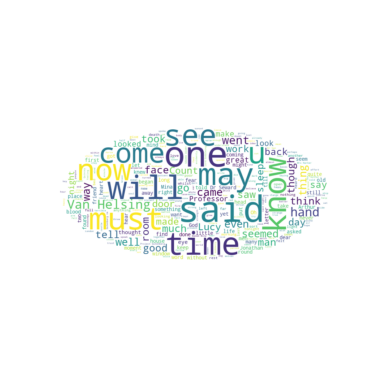

In [60]:
drac_nubpal = WordCloud(mask=mascara, background_color='white', max_words=300, max_font_size=100, relative_scaling=0.8).generate(texto)

plt.imshow(drac_nubpal, interpolation='bilinear')
plt.axis('off')
plt.show()

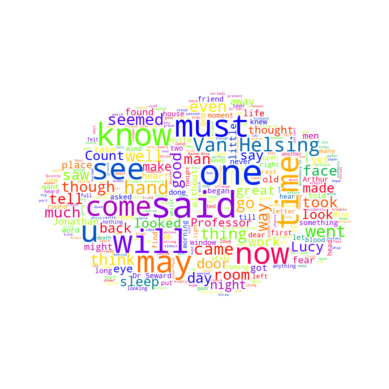

In [62]:
import imageio.v2 as imageio  # Asegúrate de usar la versión 2 de imageio

# Primero, carga la máscara
mascara2 = imageio.imread('mask_nube.png')

# Luego, crea la nube de palabras utilizando esa máscara
drac_nubpal = WordCloud(mask=mascara2, background_color='white', 
                        max_words=300, max_font_size=100, relative_scaling=0.8, 
                        stopwords=stopwords, colormap='prism').generate(texto)

# Finalmente, muestra la nube de palabras
plt.imshow(drac_nubpal, interpolation='bilinear')
plt.axis('off')
plt.show()

Y la guardas como imagen

## 12.4.- Reconocimiento de Entidades Nombradas con spaCy

Instala Spacy desde Prompt

Carga el modelo de lenguaje

In [64]:
import spacy
nlp = spacy.load("en_core_web_sm")

Crea un documento de spacy con el texto airbnb is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com

Obten las entidades nombradas

In [70]:
documento=nlp("Crea un documento de spacy con el texto airbnb is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com")

In [72]:
for entity in documento.ents: #Esto es útil para extraer información estructurada de texto no estructurado, sacamos nombres propios pero faltaron algunos
    print(f'{entity.text}:{entity.label_}')

un:ORG
el texto:ORG
American:NORP
San Francisco:GPE
California:GPE
2008:DATE
Brian Chesky:PERSON
Nathan Blecharczyk:ORG
Joe Gebbia:PERSON
